# SIR model simulation of the Kermack & McKendrick EDO system.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Constants
states = {
    'S': 0, # Susceptible
    'I': 1, # Infected
    'R': 2, # Recovered
}

In [11]:
# Parameters
M, N = 32, 32 # Grid size
T = 100 # Number of time steps
I_0 = 5 # Initial number of infected individuals
rad = 1 # Interaction radius
beta = 0.3 # Infection rate (0 <= beta <= 1)
gamma = 0.05 # Recovery rate (0 <= gamma <= 1)

In [12]:
def initGrid(M, N, I_0):
    grid = np.zeros((M, N))
    for i in range(I_0):
        x, y = np.random.randint(0, M), np.random.randint(0, N)
        grid[x, y] = 1
    return grid

In [13]:
def getNeighbors(x, y, M, N, rad):
    neighbors = []
    for i in range(-rad, rad + 1):
        for j in range(-rad, rad + 1):
            if i == 0 and j == 0:
                continue
            if 0 <= x + i < M and 0 <= y + j < N:
                neighbors.append((x + i, y + j))
    return neighbors

In [14]:
def nextIteration(grid, rad, beta, gamma):
    I, S, R = 0, 0, 0
    M, N = grid.shape
    newGrid = np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            if grid[i, j] == states['S']:
                S += 1
                for x, y in getNeighbors(i, j, M, N, rad):
                    if grid[x, y] == states['I']:
                        if np.random.uniform() < beta:
                            newGrid[i, j] = states['I']
                            break
            elif grid[i, j] == states['I']:
                I += 1
                if np.random.uniform() < gamma:
                    newGrid[i, j] = states['R']
                else:
                    newGrid[i, j] = states['I']
            else:
                R += 1
                newGrid[i, j] = states['R']
    return newGrid, S, I, R


In [15]:
def simulation(M, N, T, I_0, rad, beta, gamma):
    gridHist = []
    IHist = []
    SHist = []
    RHist = []
    grid = initGrid(M, N, I_0)
    for _ in range(T):
        grid, S, I, R = nextIteration(grid, rad, beta, gamma)
        gridHist.append(grid)
        SHist.append(S)
        IHist.append(I)
        RHist.append(R)
    return gridHist, SHist, IHist, RHist

In [17]:
def gifGrid(gridHist):
    for i, grid in enumerate(gridHist):
        plt.imshow(grid, cmap='viridis', interpolation='nearest')
        # plt.savefig('grid_{:03d}.png'.format(i))
    plt.show()

In [18]:
def evolutionPlot(SHist, IHist, RHist):
    plt.plot(SHist, label='Susceptible')
    plt.plot(IHist, label='Infected')
    plt.plot(RHist, label='Recovered')
    plt.xlabel('Time')
    plt.ylabel('Number of individuals')
    plt.legend()
    plt.show()

## Testing the model

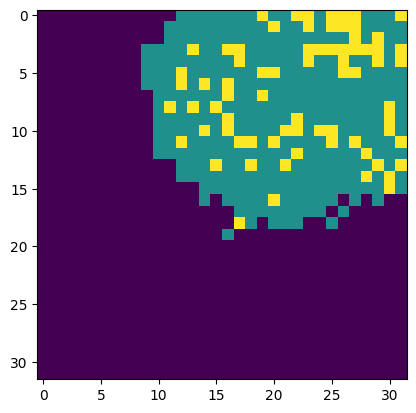

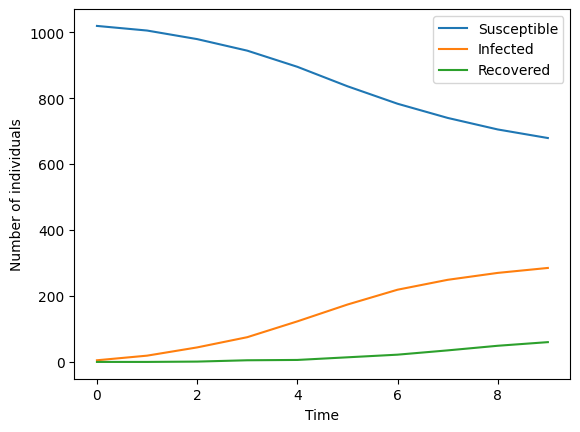

In [21]:
T = 10
gridHist, SHist, IHist, RHist = simulation(M, N, T, I_0, rad, beta, gamma)
gifGrid(gridHist)
evolutionPlot(SHist, IHist, RHist)